In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid', palette='Paired')

In [47]:
data = pd.read_csv("data/student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [48]:
data.shape

(395, 33)

## Visualize Resp

In [49]:
data.loc[data.G3 < 12, 'G3_binary'] = 0
data.loc[data.G3 >= 12, 'G3_binary'] = 1
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_binary
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0.0


<AxesSubplot: xlabel='G3_binary', ylabel='count'>

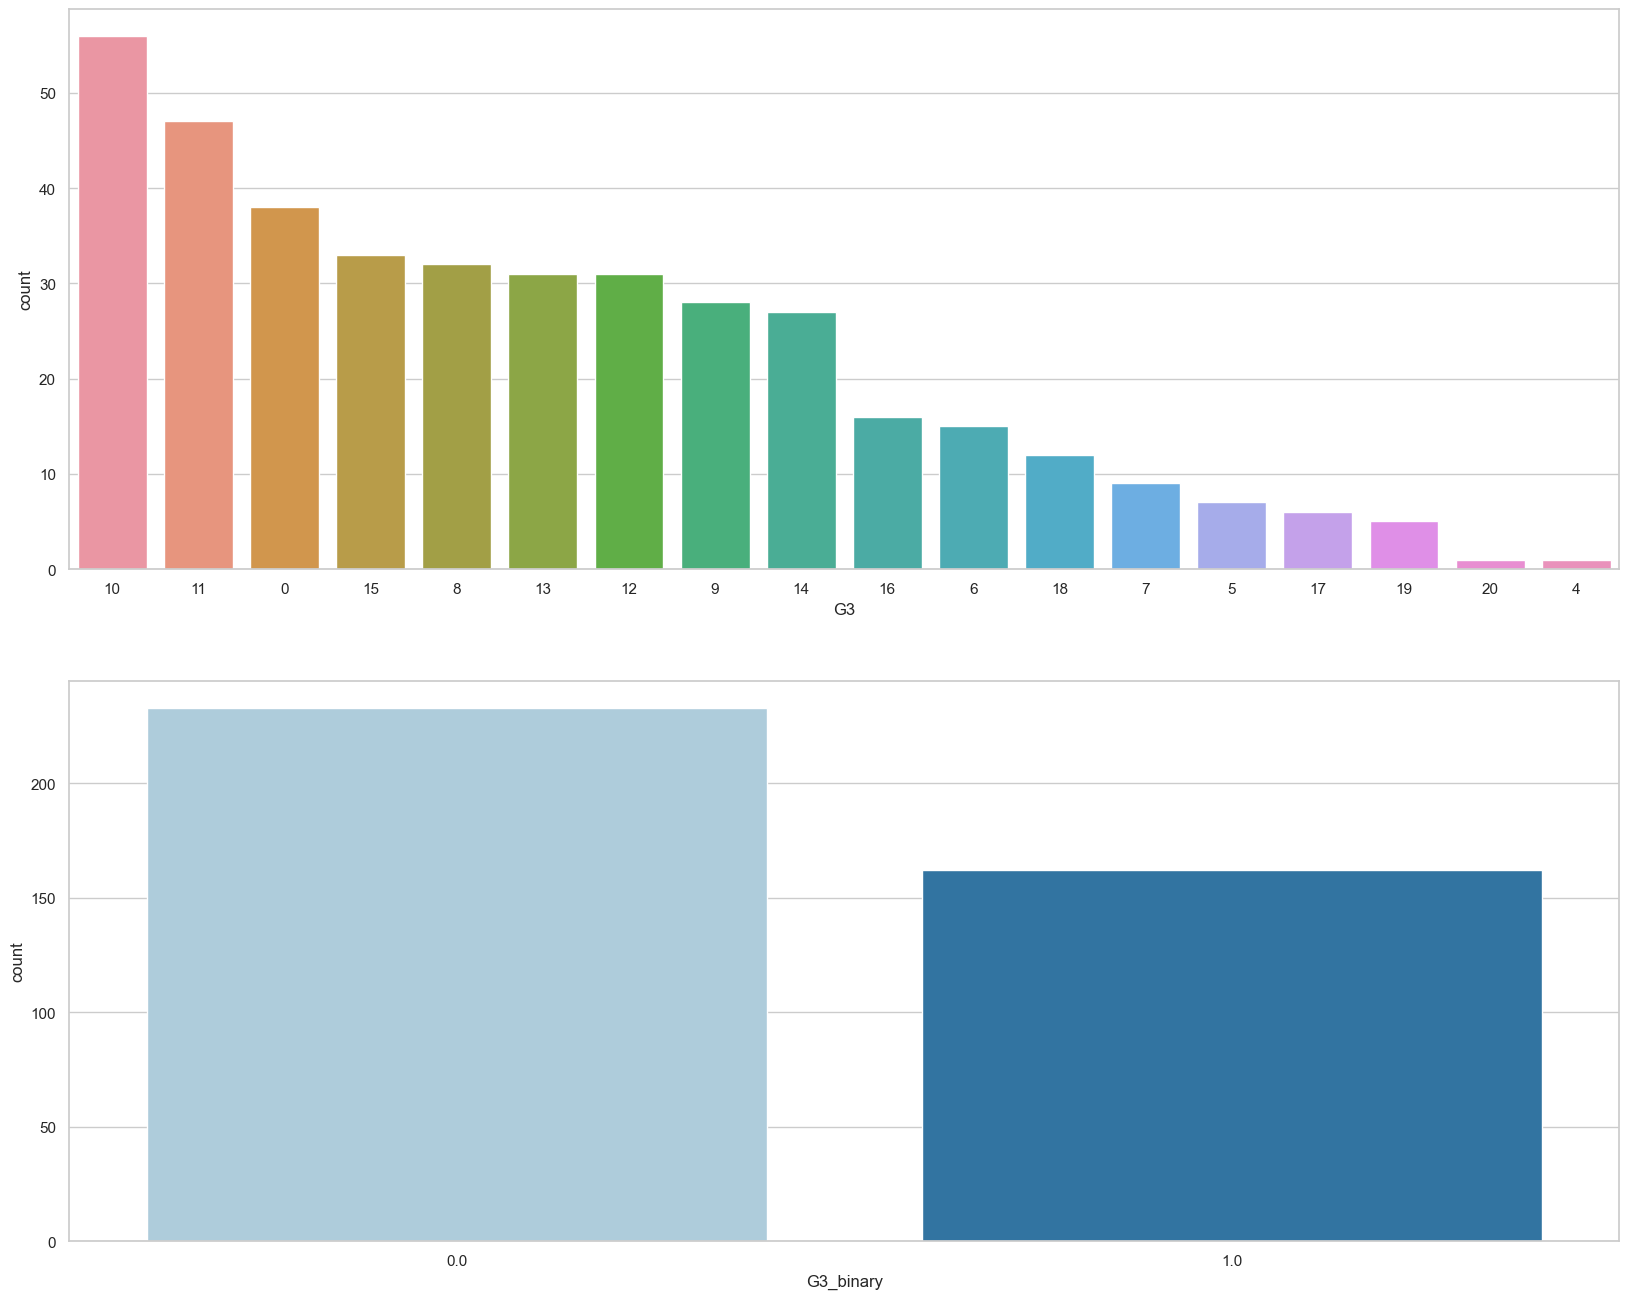

In [50]:
fig = plt.figure(figsize=(20, 16))
fig.add_subplot(2, 1, 1)
sns.countplot(x='G3', data=data, order=data['G3'].value_counts().index)
fig.add_subplot(2, 1, 2)
sns.countplot(x=data.G3_binary, order=data.G3_binary.value_counts().index)

<AxesSubplot: >

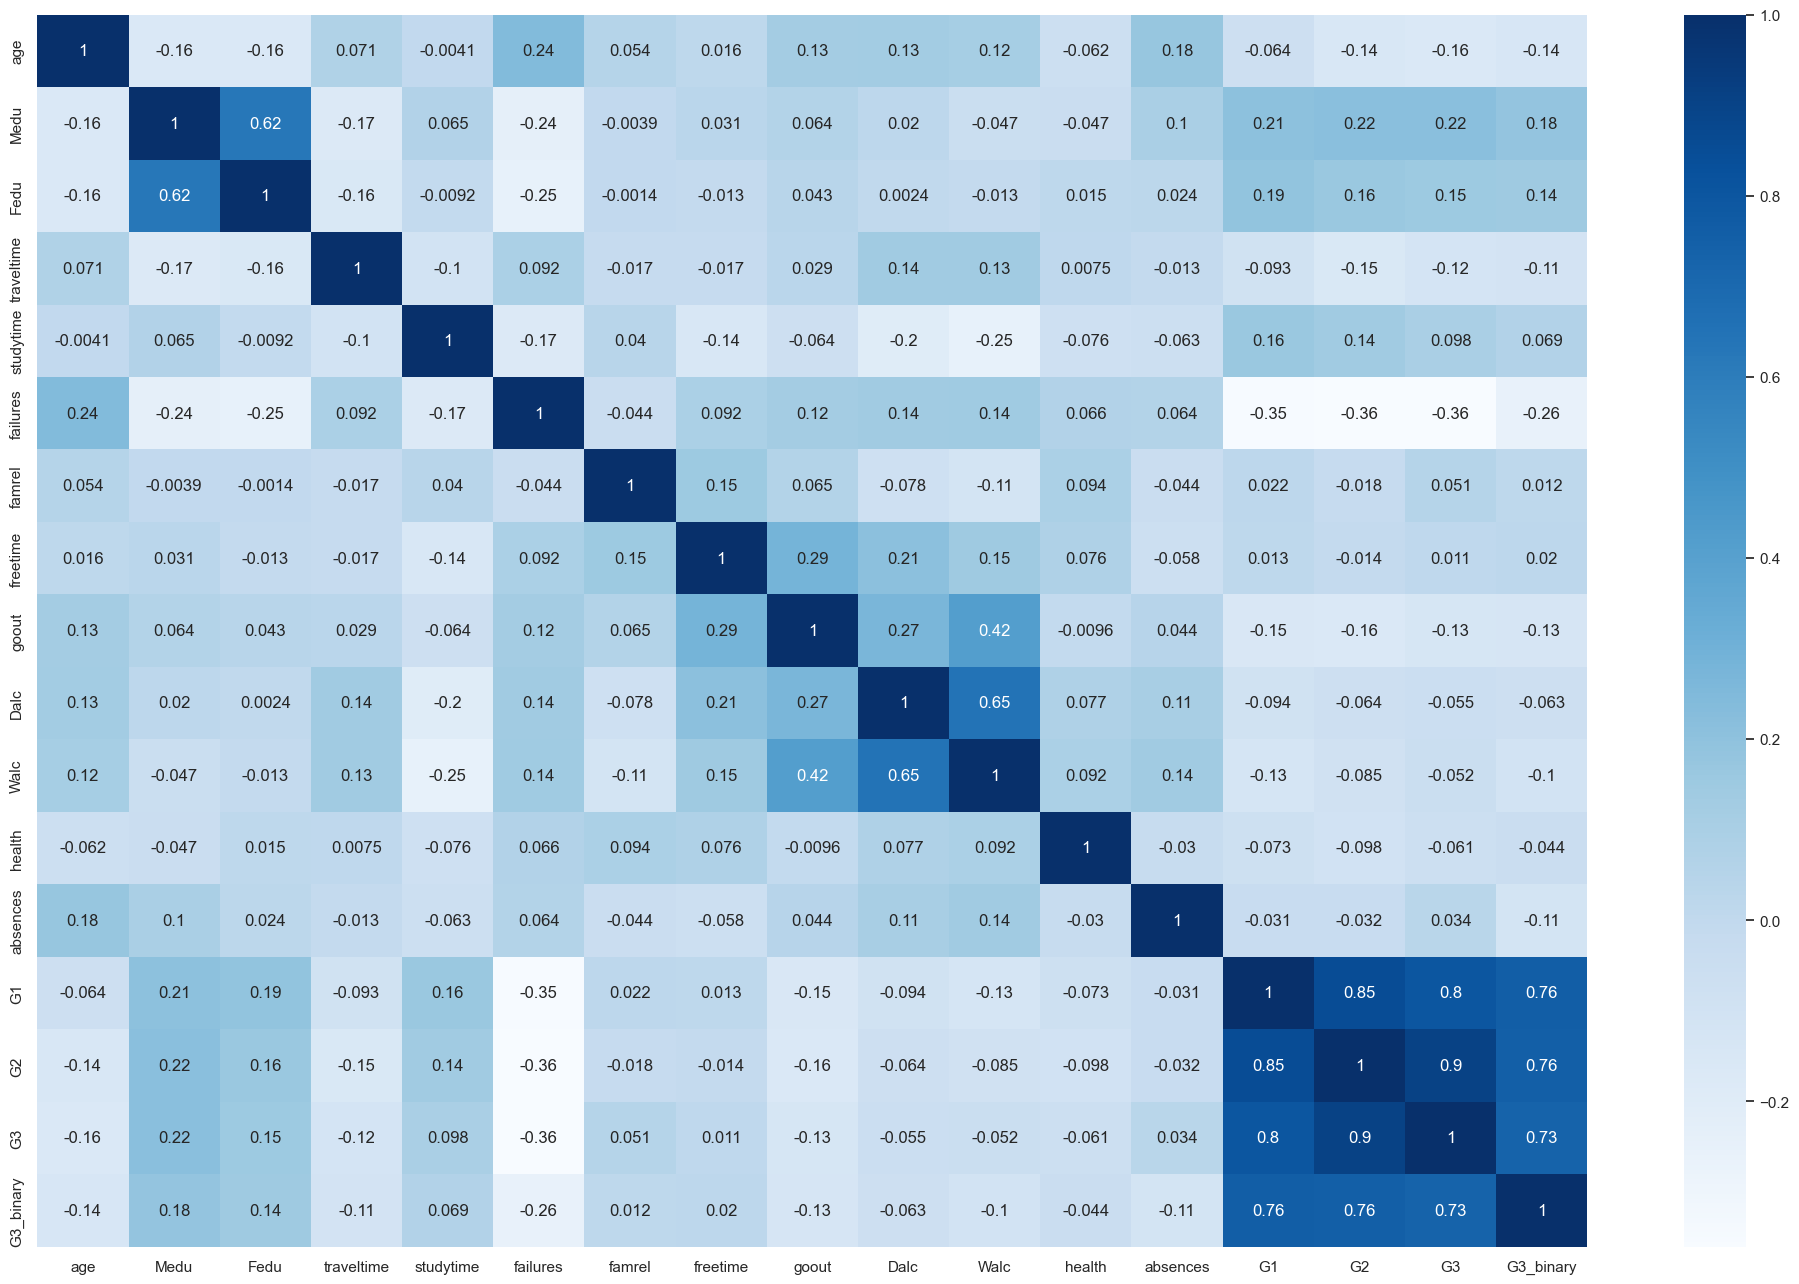

In [51]:
plt.figure(figsize=(25, 16))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')

### Study-related

Text(0.5, 1.0, 'Internet Access vs G3')

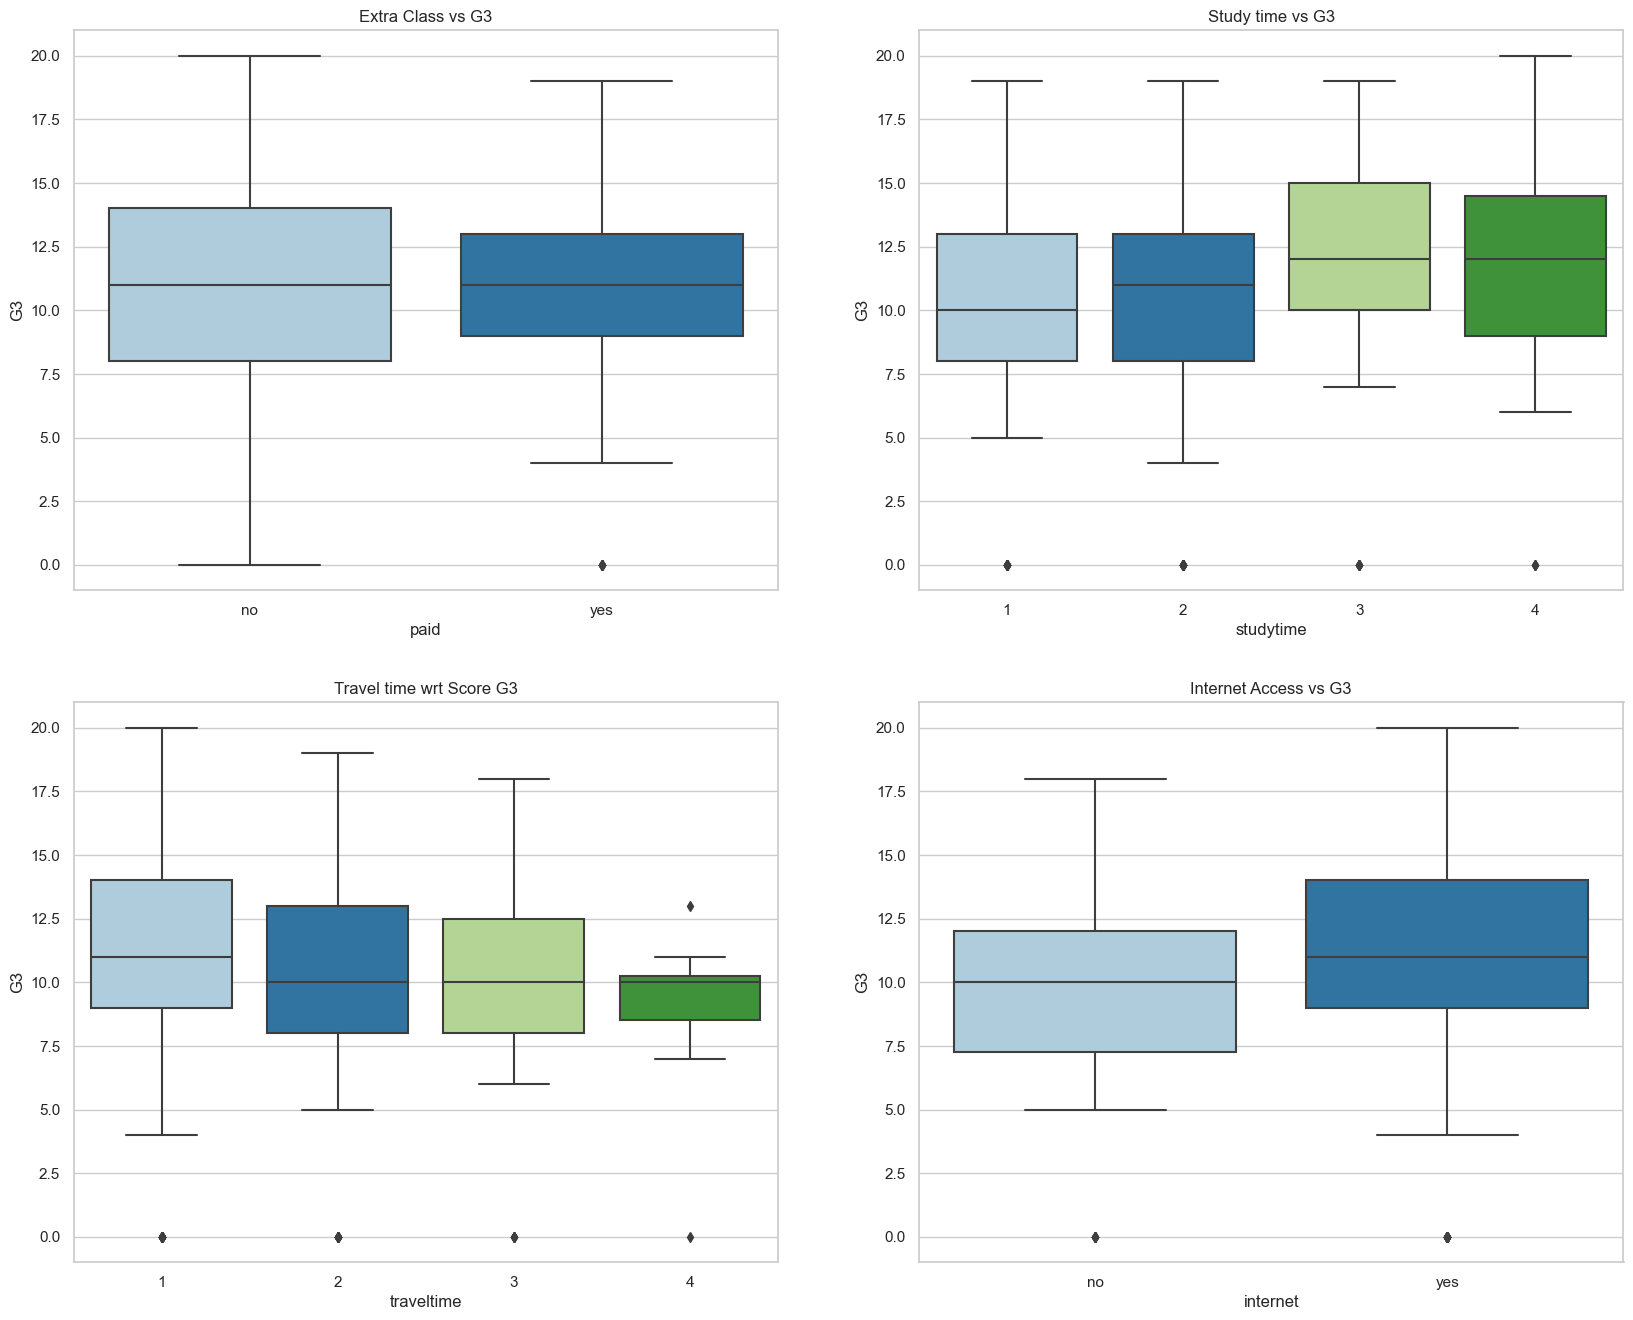

In [52]:
fig = plt.figure(figsize=(20, 16))
fig.add_subplot(2, 2, 1)
sns.boxplot(x='paid', y='G3', data=data).set_title('Extra Class vs G3')

fig.add_subplot(2, 2, 2)
sns.boxplot(x='studytime', y='G3', data=data).set_title('Study time vs G3')

fig.add_subplot(2, 2, 3)
sns.boxplot(x='traveltime', y='G3', data=data).set_title('Travel time wrt Score G3')

fig.add_subplot(2, 2, 4)
sns.boxplot(x='internet', y='G3', data=data).set_title('Internet Access vs G3')

### Social Factors

Text(0.5, 1.0, 'Romantic Relation vs G3')

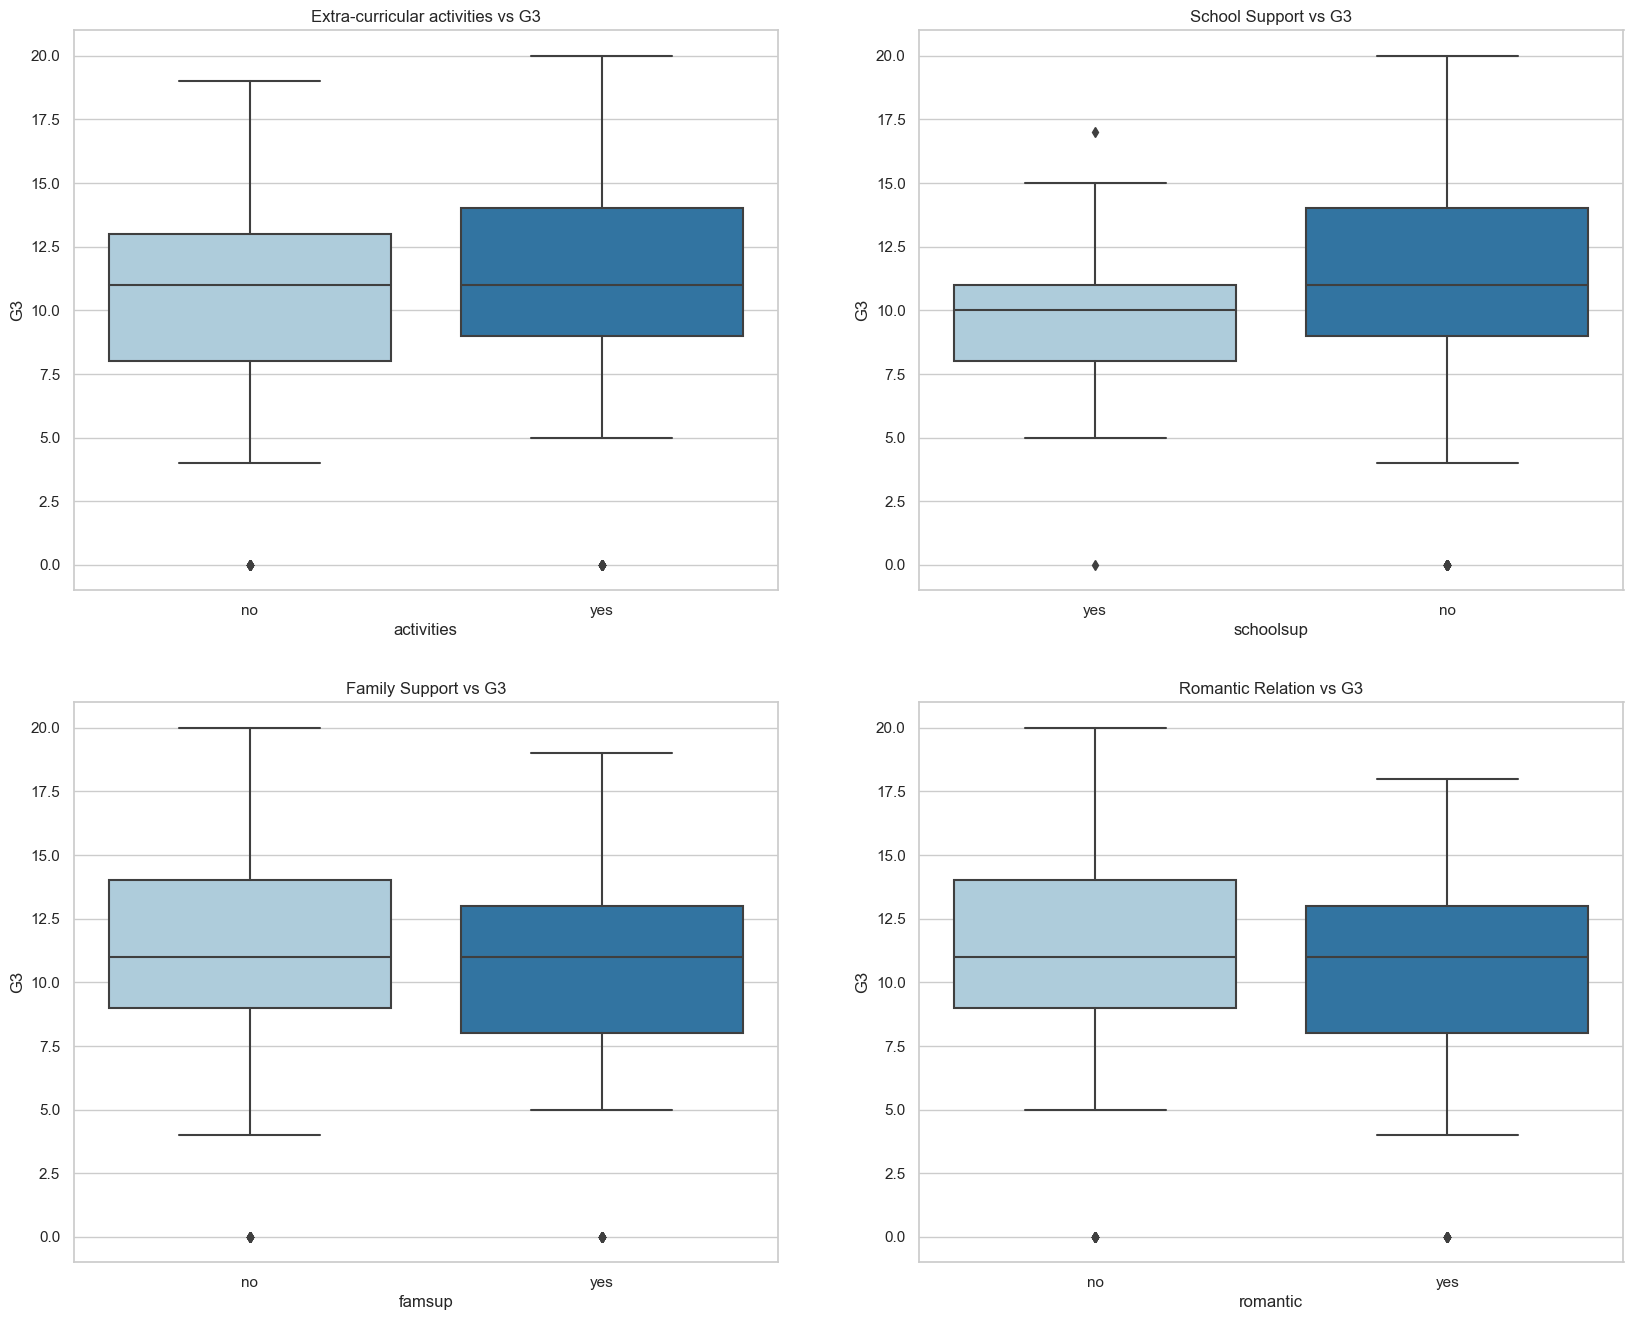

In [53]:
fig = plt.figure(figsize=(20, 16))
fig.add_subplot(2, 2, 1)
sns.boxplot(x='activities', y='G3', data=data).set_title('Extra-curricular activities vs G3')
fig.add_subplot(2, 2, 2)
sns.boxplot(x='schoolsup', y='G3', data=data).set_title('School Support vs G3')
fig.add_subplot(2, 2, 3)
sns.boxplot(x='famsup', y='G3', data=data).set_title('Family Support vs G3')
fig.add_subplot(2, 2, 4)
sns.boxplot(x='romantic', y='G3', data=data).set_title('Romantic Relation vs G3')

## Behavioral

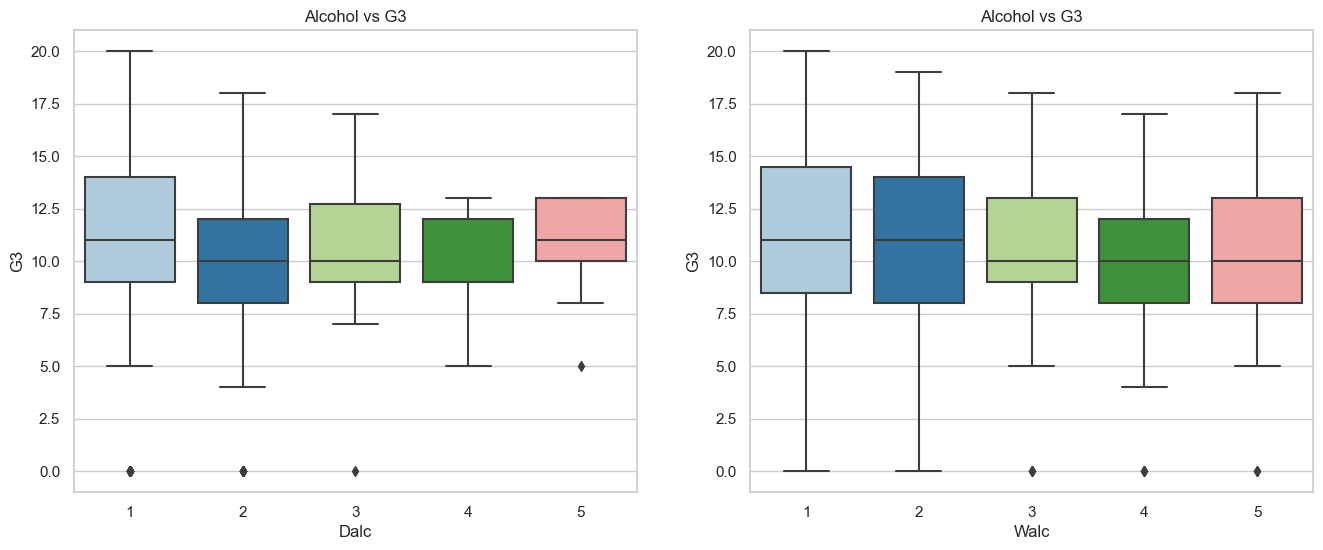

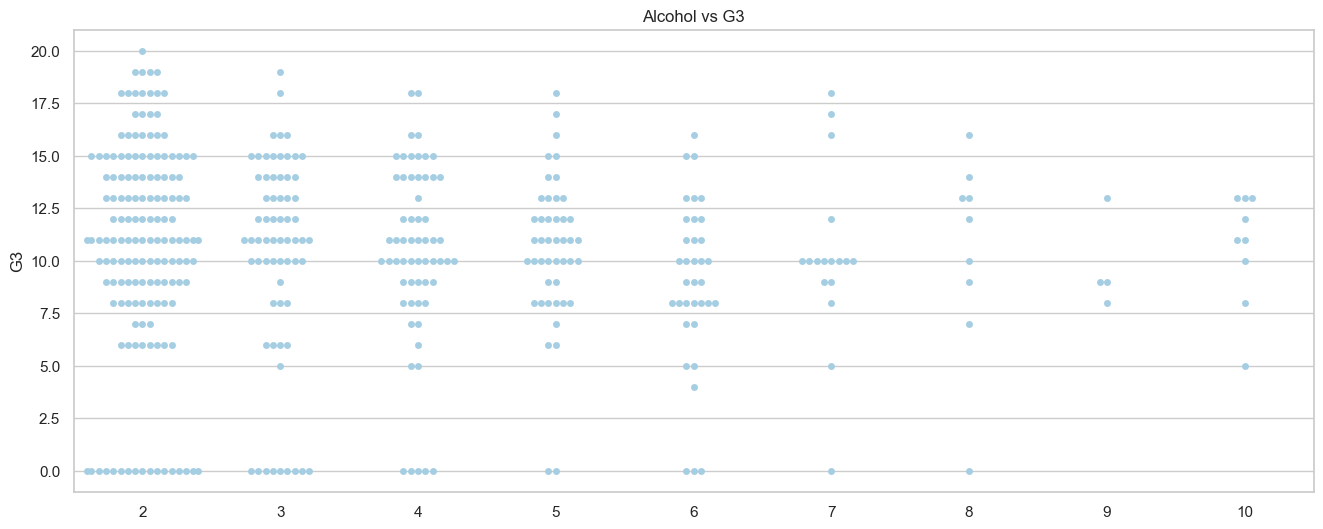

In [54]:
fig = plt.figure(figsize=(16, 6))
fig.add_subplot(1, 2, 1)
sns.boxplot(x='Dalc', y='G3', data=data).set_title('Alcohol vs G3')
fig.add_subplot(1, 2, 2)
sns.boxplot(x='Walc', y='G3', data=data).set_title('Alcohol vs G3')

alc = data['Dalc'] + data['Walc']
fig = plt.figure(figsize=(16, 6))
sns.swarmplot(x=alc, y='G3', data=data).set_title('Alcohol vs G3')
plt.show()

<AxesSubplot: xlabel='G2', ylabel='G3'>

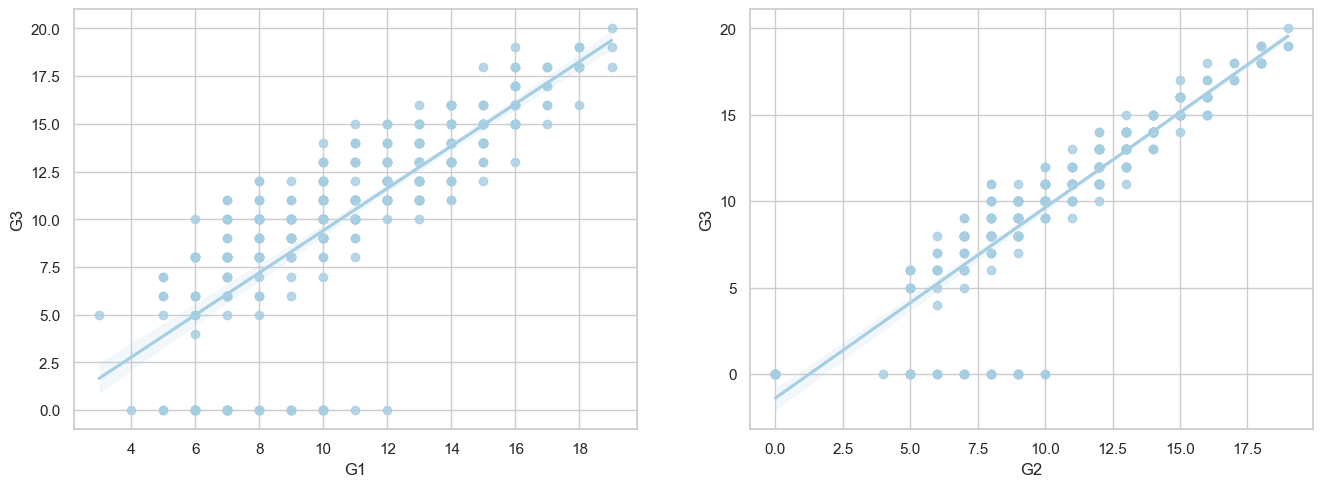

In [55]:
fig = plt.figure(figsize=(16, 12))
fig.add_subplot(2, 2, 1)
sns.regplot(x='G1', y='G3', data=data)
fig.add_subplot(2, 2, 2)
sns.regplot(x='G2', y='G3', data=data)


## Pre-Processsing

In [56]:
data['school'] = data['school'].map({'GP':0, 'MS':1})
data['sex'] = data['sex'].map({'F':0, 'M':1})
data['famsize'] = data['famsize'].map({'GT3':0, 'LE3':1})

binary_mapping = {'yes':1, 'no':0}
data['schoolsup'] = data['schoolsup'].map(binary_mapping)
data['famsup'] = data['famsup'].map(binary_mapping)
data['paid'] = data['paid'].map(binary_mapping)
data['activities'] = data['activities'].map(binary_mapping)
data['nursery'] = data['nursery'].map(binary_mapping)
data['higher'] = data['higher'].map(binary_mapping)
data['internet'] = data['internet'].map(binary_mapping)
data['romantic'] = data['romantic'].map(binary_mapping)
#
data.loc[:,'Dalc']= data['Dalc'] + data['Walc']
data = data.drop(columns='Walc')

In [57]:
X = data.iloc[:,:33].select_dtypes(exclude="object")
y = data.G3

In [58]:
from sklearn.feature_selection import SelectKBest, chi2

k_best = SelectKBest(score_func=chi2, k=15)
k_best.fit(X, y)
df_score = pd.Series(data=k_best.scores_, index=X.columns)
df_score.sort_values(ascending=False)

G3            794.023821
absences      648.166848
G2            451.680952
G1            319.716427
G3_binary     233.000000
failures      140.934898
Dalc           41.036997
schoolsup      28.319018
romantic       20.089526
paid           16.129900
Medu           13.894852
famsize        12.429690
sex            10.581662
goout          10.472494
Fedu           10.375563
school         10.310678
health         10.176668
activities      7.601049
traveltime      6.758151
studytime       6.231603
famsup          5.303438
freetime        4.479465
nursery         3.297083
internet        2.999142
age             2.277762
famrel          2.110686
higher          1.234479
dtype: float64

In [59]:
features_selected = df_score.nlargest(3).index

In [60]:
# train = split
from sklearn.model_selection import train_test_split, KFold, cross_val_score
k_fold = KFold(n_splits=10, random_state=1, shuffle=True)
train, test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
train.head()

,school,sex,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,G3_binary
23,0,1,16,1,2,2,2,2,0,0,...,5,4,4,6,5,0,13,13,12,1.0
296,0,0,19,0,4,4,2,2,0,0,...,2,3,4,5,2,0,10,9,0,0.0
13,0,1,15,0,4,3,2,2,0,0,...,5,4,3,3,3,2,10,10,11,0.0
249,0,1,16,0,0,2,1,1,0,0,...,4,3,2,6,5,0,13,15,15,1.0
61,0,0,16,0,1,1,4,1,0,1,...,5,5,5,10,5,6,10,8,11,0.0


In [61]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge
# classifiers = {
#     'Linear Regression' : LinearRegression(),
#     'Lasso': Lasso(),
#     'Ridge': Ridge(),
# }

# for key, clf in classifiers.items():
#     print(key, clf)
#     score = cross_val_score(clf, X_train, y_train, cv=k_fold, scoring='neg_mean_squared_error')
#     rmse = np.sqrt(-score)
#     rmse_score = np.mean(rmse)
#     print('RMSE score with CV of {0} is {1}'.format(key, rmse_score))

In [62]:
# lm_fit = LinearRegression().fit(X_train, y_train)
# lm_fit.coef_

In [63]:
# pred_score = lasso_fit.predict(X[selected])
# df_res = pd.DataFrame([pred_score,y], index=["pred","true"]).T
# df_res.loc[pred_score < 12] = 0
# df_res.loc[pred_score >= 12] = 1
# y[y < 12] = 0
# y[y >= 12] = 1
# # df_res
# np.mean(df_res.pred == df_res.true)

# Linear Regression Model

In [64]:
train = pd.DataFrame(train)
train.head()

,school,sex,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,G3_binary
23,0,1,16,1,2,2,2,2,0,0,...,5,4,4,6,5,0,13,13,12,1.0
296,0,0,19,0,4,4,2,2,0,0,...,2,3,4,5,2,0,10,9,0,0.0
13,0,1,15,0,4,3,2,2,0,0,...,5,4,3,3,3,2,10,10,11,0.0
249,0,1,16,0,0,2,1,1,0,0,...,4,3,2,6,5,0,13,15,15,1.0
61,0,0,16,0,1,1,4,1,0,1,...,5,5,5,10,5,6,10,8,11,0.0


#### G3 ~  absences * failures  + schoolsup + romantic

In [65]:
import statsmodels.formula.api as smf

# lm = smf.ols('G3 ~ absences  + G1 + G2', data = X).fit()
# lm.summary()

lm = smf.ols(formula='G3 ~  absences * failures  + schoolsup + romantic', data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     13.32
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           9.02e-12
Time:                        19:07:10   Log-Likelihood:                -911.32
No. Observations:                 316   AIC:                             1835.
Df Residuals:                     310   BIC:                             1857.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.7152      0.362     32.347      0.000      11.003      12.428
absences             -0.0013      0.034     -0.038      0.970      -0.068       0.065
failures             -3.1996      0.452     -7.074      0.000      -4.090      -2.310
absences:failures     0.1662      0.054      3.082      0.002       0.060       0.272
schoolsup            -1.5882      0.789     -2.014      0.045      -3.140      -0.036
romantic             -1.3497      0.532     -2.535      0.012      -2.397      -0.302
==============================================================================
Omnibus:                       25.451   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.178
Skew:                          -0.718   Prob(JB):                     4.61e-07
Kurtosis:                       3.391   Cond. No.                         34.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
lm.params

Intercept            11.715247
absences             -0.001286
failures             -3.199632
absences:failures     0.166180
schoolsup            -1.588172
romantic             -1.349672
dtype: float64

##### G3 =
#### 11.715247 +  absences * (-0.001286) + failures * (-3.199632) + absences * failures (0.166180 + schoolsup * (-1.588172) + romantic * (-1.349672)

## Predicting Test Dataset

In [67]:
pred_test = lm.predict(test)
data = pd.concat([pred_test, y_test], axis = 1)
test_res = pd.DataFrame(data, columns=["predicted", "actual"], dtype="float64")
test_res[pred_test < 12],test_res[pred_test >= 12] = 0,1
test_res[pred_test < 6],test_res[pred_test >= 12] = 0,1
y_test[y_test < 12],y_test[y_test >= 12] = 0,1
# test_res.head()

In [68]:
np.mean(test_res.predicted == test_res.actual)

1.0

## Predicting Full Dataset

In [69]:
X.shape, y.shape

((395, 27), (395,))

In [70]:
pred_full = lm.predict(X)
pred_full[pred_full < 12] = 0
pred_full[pred_full >= 12] = 1

In [71]:
data = pd.concat([pred_full, y], axis = 1)
test_res = pd.DataFrame(data, columns=["predicted", "actual"], dtype="float64")
test_res[pred_full < 12] = 0
test_res[pred_full >= 12] = 1
y_test[y_test < 12] = 0
y_test[y_test >= 12] = 1
test_res

,predicted,actual
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
390,0.0,0.0
391,0.0,0.0
392,0.0,0.0
393,0.0,0.0


In [72]:
np.mean(test_res.predicted == test_res.actual)

1.0